# Load the dataframe

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("data_small/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


# Show certain rows

In [5]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,0
11,1,35381,1860-01-12,-18,0
12,1,35381,1860-01-13,-27,0
13,1,35381,1860-01-14,-26,0
14,1,35381,1860-01-15,-37,0
15,1,35381,1860-01-16,-9,0
16,1,35381,1860-01-17,7,0
17,1,35381,1860-01-18,-6,0
18,1,35381,1860-01-19,-16,0
19,1,35381,1860-01-20,-19,0


# Show certain columns

In [6]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [7]:
df[["   TG", "    DATE"]]

,TG,DATE
0,21,1860-01-01
1,46,1860-01-02
2,31,1860-01-03
3,37,1860-01-04
4,31,1860-01-05
...,...,...
59316,-9999,2022-05-27
59317,-9999,2022-05-28
59318,-9999,2022-05-29
59319,-9999,2022-05-30


In [8]:
df["    DATE"]

0       1860-01-01
1       1860-01-02
2       1860-01-03
3       1860-01-04
4       1860-01-05
           ...    
59316   2022-05-27
59317   2022-05-28
59318   2022-05-29
59319   2022-05-30
59320   2022-05-31
Name:     DATE, Length: 59321, dtype: datetime64[ns]

# Simple Statistics and filtering

In [9]:
df["   TG"].mean()

-991.1500649011311

In [12]:
df.loc[df["   TG"] != -9999]["   TG"].mean() / 10

6.360787526128467

In [13]:
df.loc[df["   TG"] != -9999]["   TG"].max() / 10

26.2

In [14]:
df.loc[df["   TG"] != -9999]["   TG"].min() / 10

-28.8

<Axes: >

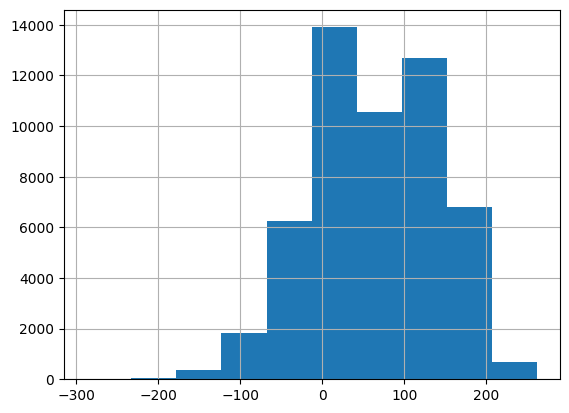

In [16]:
df.loc[df["   TG"] != -9999]["   TG"].hist()

# Get Certain cells

In [17]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,0
1,1,35381,1860-01-02,46,0
2,1,35381,1860-01-03,31,0
3,1,35381,1860-01-04,37,0
4,1,35381,1860-01-05,31,0
...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9
59317,1,35381,2022-05-28,-9999,9
59318,1,35381,2022-05-29,-9999,9
59319,1,35381,2022-05-30,-9999,9


In [36]:
# squeeze is for getting actual value
df.loc[df["    DATE"] == "1860-01-05"]["   TG"].squeeze() / 10

3.1

In [37]:
df.loc[df["   TG"] == df["   TG"].max()]["    DATE"].squeeze()

Timestamp('1868-08-16 00:00:00')

In [38]:
df.loc[3,"   TG" ]

37

# Calculate a new column out of existing column

In [39]:
import numpy as np
df["TG0"] = df["   TG"].mask(df["   TG"]== -9999, np.nan)

In [40]:
df["TG"] = df["TG0"] /10

In [41]:
df["Fahrenheit"] = df["TG"] = (9/5) + 32
df

,STAID,SOUID,DATE,TG,Q_TG,TG,TG0,Fahrenheit
0,1,35381,1860-01-01,21,0,33.8,21.0,33.8
1,1,35381,1860-01-02,46,0,33.8,46.0,33.8
2,1,35381,1860-01-03,31,0,33.8,31.0,33.8
3,1,35381,1860-01-04,37,0,33.8,37.0,33.8
4,1,35381,1860-01-05,31,0,33.8,31.0,33.8
...,...,...,...,...,...,...,...,...
59316,1,35381,2022-05-27,-9999,9,33.8,NaN,33.8
59317,1,35381,2022-05-28,-9999,9,33.8,NaN,33.8
59318,1,35381,2022-05-29,-9999,9,33.8,NaN,33.8
59319,1,35381,2022-05-30,-9999,9,33.8,NaN,33.8


# Plotting

<Axes: >

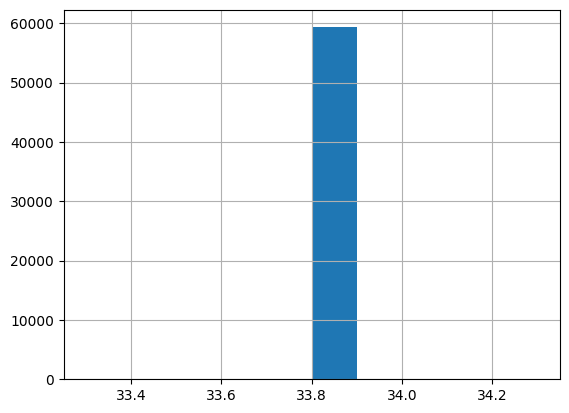

In [45]:
df["TG"].hist()

<Axes: xlabel='    DATE'>

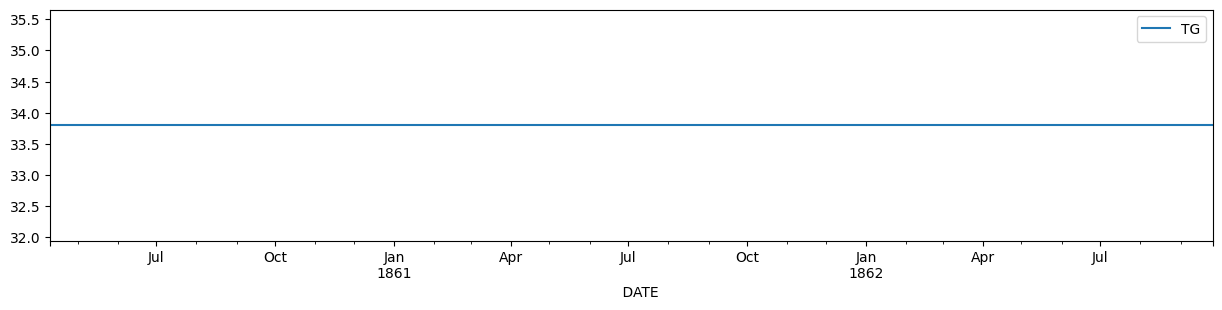

In [43]:
df[100:1000].plot(x="    DATE", y="TG", figsize=(15,3))